#CH4.선형회귀

In [ ]:
#선형회귀
#여러가지 데이터를 활용하여 연속형 변수인 목표변수를 예측해내는것이 목적
#예측할 종속변수만 연속형 변수이면 되고 그외 변수들은 연속형일 필요가 없다.
#독립변수가 연속형이 아닐 경우, 인코딩등의 작업이 필요할 수 있다.

1)문제 정의 : 한눈에 보는 예측 목표

---
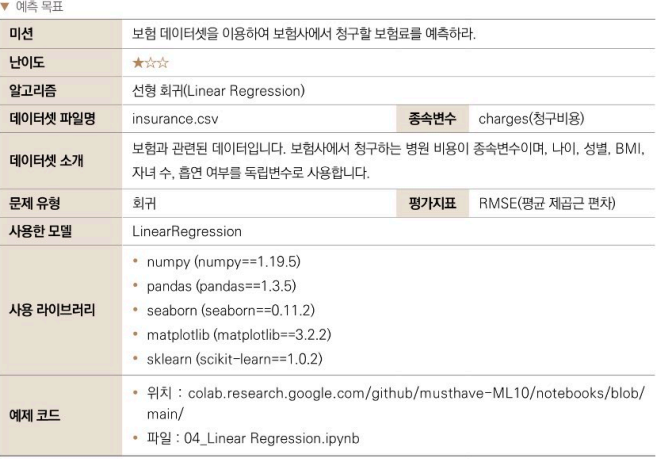

2)라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'
data = pd.read_csv(file_url)
#pd.read_csv()를 사용해 판다스 데이터프레임 형태로 데이터를 불러오게 됨

3)데이터 확인하기

In [3]:
data
#변수 6개, 인덱스 1338

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [4]:
data.head()
#상위 5줄 출력
#성별과 흡연여부는 범주형 변수

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [5]:
data.info()
#column - 변수이름
#Non-Null Count - Null은 결측치, non-null은 빈값이 없다. 모든변수 1338개에 빈값이 없다는 사실 확인
#Dtype - 자료형. float,int로만 구성.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [6]:
data.describe()
#통계 정보 출력

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [7]:
round(data.describe(),2)
#소수점 2자릿수까지 반올림

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


4)전처리 : 학습셋, 시험셋 나누기

In [ ]:
#데이터를 나누는 작업은 크게 두가지
#첫째는 종속변수와 독립변수 분리
#둘째는 학습셋, 시험셋 나누기
#학습셋 시험셋비율은 보통 7:3 혹은 8:2정도로 나눔. 학습셋이 더 중요하기에 전체 데이터 크기가 작을수록 시험셋 비율을 낮게 잡는다.

4-1)학습셋, 시험셋을 나누는 이유

In [ ]:
#학습셋과 시험셋에 사용한 데이터가 동일하다면 모델을 만들고 나서 새로운 데이터에도 맞는지 검증하지않은거나 다름없기 때문.
#모델이 학습셋에 지나치게 잘 맞도록 학습되어 새로운 데이터 대한 예측력이 떨어지는 오버피팅 문제를 방지할 수 있다.

4-2)데이터셋 나누기

In [8]:
X = data[['age','sex','bmi','children','smoker']] #독립변수
y = data['charges'] #종속변수

In [18]:
from sklearn.model_selection import train_test_split #모듈 불러오기
#사이킷런 - 학습셋,시험셋을 나누어주는 train_test_split 모듈 제공

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

#train_test_split()이라는 함수가 데이터셋 4개를 결과물로 내보내므로, 이를 받아줄 4개의 변수 필요
#test_size=0.2 - 시험셋 크기 20%. 8:2비율로 나누겠다.
#random_state=100 - 결과의 일관성을 유지하기 위해 랜덤 샘플링을 하면서도
#매번 같은 모습의 훈련셋/시험셋을 얻을 수 있다.

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1070, 5)
(1070,)
(268, 5)
(268,)


5)모델링

In [20]:
from sklearn.linear_model import LinearRegression
#알고리즘 선택.이번 데이터셋에는 선형 회귀 알고리즘을 사용한다.
#sklearn.linear_model에서 선형 회귀 라이브러리를 불러온다.

In [21]:
model = LinearRegression()
#모델 생성. model이라는 이름의 객체에 선형회귀의 속성 부여

In [22]:
model.fit(X_train,y_train)
#학습을 시키는 fit()함수에 학습셋의 독립변수, 종속변수를 인수로 대입. 학습과정이므로 학습셋 사용

LinearRegression()

6)모델을 활용해 예측하기

In [24]:
pred = model.predict(X_test)
#train_test_split()함수에 평가셋의 독립변수를 인수로 대입

pred

array([ 4765.24946593,  4957.73086482,  8298.98815254,  3078.81186784,
       24165.95654247, 36827.72848649, 14683.34729348,  2599.3384217 ,
       29378.62194348, 16011.75090087, 15493.17858732,  5101.23688482,
       11011.10641383,  4161.31766196,  9810.62254709, 31856.8853975 ,
       12016.55190749, 13235.61067675,  7251.8789603 , 18394.80961708,
       14393.20060321,  3253.85100146,  6715.71478454, 31290.24757633,
       13776.33709853, 31904.24021054,  6397.17630407, 39339.48397832,
       31565.9666249 , 13742.23078678, 18448.10494977,  2282.95976263,
       38922.93999878, 26116.16609375,  8866.70869349, 12036.24255782,
        8406.17827743, 32351.5635203 ,  3959.06572303, 38354.72996424,
        8219.4129384 , 12308.73069101,  5604.28772112,  8468.4404493 ,
         651.06780185,  5503.69704365,  5673.30373447,  3843.67247433,
        2098.72488739, 11186.31121281, 17460.67125615,  7916.72813038,
        5042.69712676,  8273.18990771,  7541.05592985, 14372.15862948,
      

7)예측 모델 평가하기

In [ ]:
#테이블로 평가하기, 그래프로 평가하기, 통계적인 방법으로 평가하기

7-1)테이블로 평가하기

In [ ]:
comparison = pd.DataFrame({'actual':y_test,'pred':pred})
#예측한 값은 pred에, 각각 관측치에 대한 실제 정보는 y_test에 저장되어 있다.
#예측값이 얼마나 정확한지는 pred와 y_test를 비교하는 것으로 단순하게 확인 가능

comparison
#수치를 나타낼뿐. 예측 결과를 이런식으로 하나하나 확인하는 방식에는 한계가 있음

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


7-2)그래프로 평가하기

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='actual', ylabel='pred'>

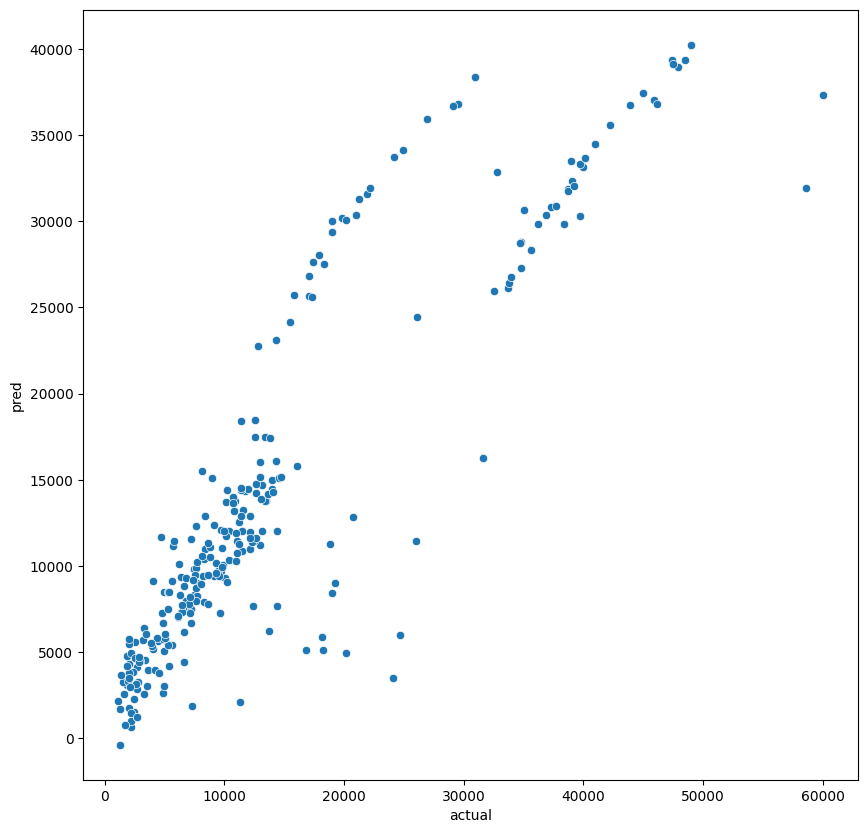

In [29]:
plt.figure(figsize=(10,10)) #그래프 크기 정의
sns.scatterplot(x = 'actual', y = 'pred', data = comparison) #산점도 그래프 만들기
#그래프로 평가를 하는 방식은 어디까지나 직관적으로 예측, 객관적인 기준이 되지는 않는다.
#보통 모델을 해당 방식으로 평가하지는 않지만 시각적인 이해를 위해 그려봤다

3)통계적인 방법으로 평가하기 RMSE

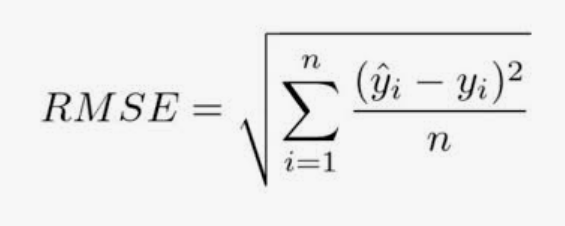

In [ ]:
#예측값에서 실제값을 빼준것을 잔차라하는데 잔차를 그냥 합해버리면 0이 되기 때문에 제곱합을 해주고 이 값을 평균낸 것이 MSE이고 MSE값에 루트를 씌워준것이 RMSE이다.

In [32]:
from sklearn.metrics import mean_squared_error #MSE라이브러리 불러오기
mean_squared_error(y_test,pred) ** 0.5 #RMSE 계산 실행

#RMSE계산 실행 이유 - MSE값은 숫자 규모가 너무 크기에 루트를 씌워줌

5684.927776334484

In [39]:
model.score(X_train,y_train)
#결정계수 R제곱 계산
#R제곱 = 독립변수로 설명되는 종속변수의 분산 비율. 모델이 얼마만큼의 비율로 실젯값에 가깝게 예측하는지
#R제곱은 1에 가까울수록 좋으며 0.74값은 일반적으로 괜찮은 수치라 볼 수 있다.

0.7368220127747351

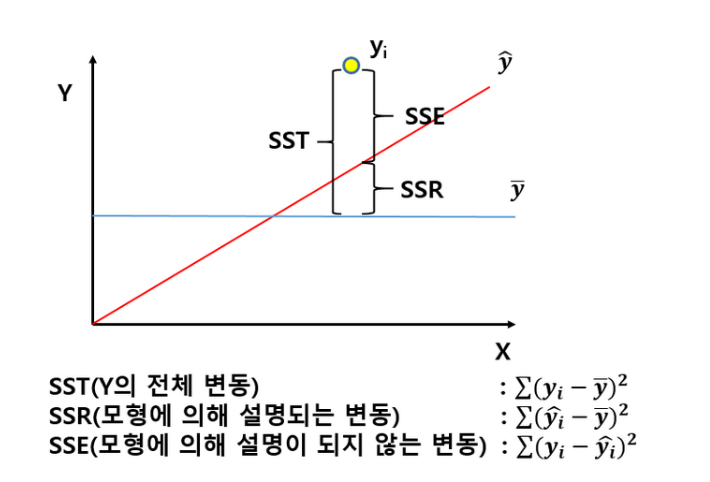![image.png](
  
)

In [ ]:
#결정계수의 수식은 1 - SSE/SST인데 SST는 실제값에서 y의 평균값을 뺀값을 제곱한것의 합이고 SSE는 실제값에서 모델이 예측한 값을 뺀값을 제곱한 것의 합입니다.
#그렇기 때문에 실제값에서 평균값을 빼준 SST보다 실제값에서 모델이 예측한 값을 빼준 SSE값이 더 작아야 모델의 설명력이 높다고 할 수 있기 때문에 이러한 수식이 나왔습니다.

In [ ]:
#예를 들어 SSE가 SST보다 충분히 작다면 SSE/SST값은 0에 가까워지기떄문에 결정계수는 1에 가까워진다.

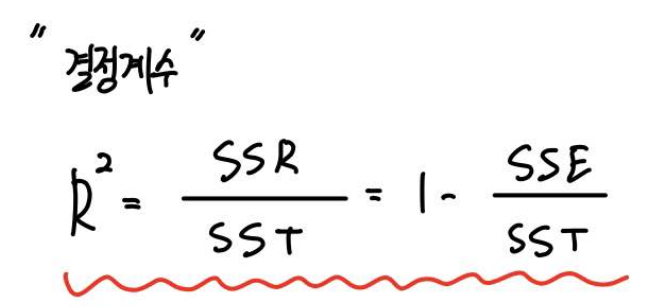![image.png](
  
)

8)이해하기:선형회귀

In [45]:
print(model.coef_)
#독립변수 5개에 대한 계수(기울기값) (넘파이 형태로 출력)

[2.64799803e+02 1.73446608e+01 2.97514806e+02 4.69339602e+02
 2.34692802e+04]


In [44]:
print(pd.Series(model.coef_, index = X.columns))
#나이가 1만큼 증가하면 보험료는 265만큼 증가.
#성별, 흡연자 여부는 남자(1)의 경우 여자(0)보다 보험료가 보통 17정도 높다
#흡연자(1)의 경우 비흡연자(0)보다 보통 23469정도 높다

age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64


In [43]:
print(model.intercept_)
#y절편 제공

-11576.99997611237


선형회귀를 1차함수 형태로 **나타내기**

charges = 264.799803*age + 17.344661*sex + 297.514806*bmi + 469.339602*children
+23469.280173*smoker - 11576.999976112367

결론

In [ ]:
# 통계적 유의성 및 인과성을 도출하기 위한 추가적인 분석이 진행되지 않은 선형회귀 모델이기 때문에 한계점이 있다.
# 기본적으로 계수의 절댓값이 클수록 영향력이 크다고 할 수 있고, 절댓값이 0에 가까울수록 영향력이 거의 없다고 할 수 있다.
# 다만 서로를 비교할땐 각 변수의 스케일이 다르기 떄문에 단순히 절댓값이 더 크면 영향력이 더 크다고 보기에는 무리가 있다.